<a href="https://colab.research.google.com/github/ChaelinL/Deeplearning_for_everyone/blob/main/16%EC%9E%A5_%EC%8B%A4%EC%8A%B5(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 손글씨 인식하기: 데이터 전처리

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


<function matplotlib.pyplot.show(*args, **kw)>

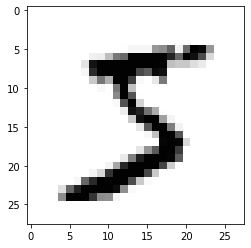

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋의 개수 확인
print(f"학습셋 이미지 수 : {X_train.shape[0]}개")
print(f"테스트셋 이미지 수 : {X_test.shape[0]}개")

# 첫 번째 이미지 확인
plt.imshow(X_train[0], cmap='Greys')  # imshow() 함수를 통해 이미지 출력가능 / Train셋의 첫 번째 이미지를 회색으로 불러온다는 뜻
plt.show

In [2]:
# 이미지가 인식되는 원리 알아보기
for x in X_train[0]:
  for i in x:
    sys.stdout.write("%-3s" % i)
  sys.stdout.write("\n")

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [3]:
# 차원 변환 과정 (정규화)
X_train = X_train.reshape(X_train.shape[0], 784)  # 28*28의 2차원 배열을 784개의 1차원 배열로 변경
X_train = X_train.astype('float64')  # 정규화 위해 주어진 정수 데이터값을 실수형으로 변경 
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255

print(f"class: {y_train[0]}")

class: 5


In [4]:
# 바이너리화 과정 (원-핫 인코딩)
y_train = to_categorical(y_train, 10)  # to_categorical(클래스, 클래스의 개수) 형식
y_test = to_categorical(y_test, 10)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# MNIST 손글씨 인식하기: 기본 프레임

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import os

# 모델 구조 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간
modelpath = "./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print(f"\n Test Accuracy: {round(model.evaluate(X_test, y_test)[1], 4)}")


Epoch 1: val_loss improved from inf to 0.18850, saving model to ./MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18850 to 0.13572, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13572 to 0.11201, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11201 to 0.09993, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09993 to 0.09878, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09878 to 0.08905, saving model to ./MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08905 to 0.08535, saving model to ./MNIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08535

Epoch 9: val_loss improved from 0.08535 to 0.08218, saving model to ./MNIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.08218

Epoch 11: val_loss improved from 0.08218 to 0.08007, saving model to ./MNIST_MLP.hdf5

Epoch 12: val_loss did not improve from 0.08007

Epoch 13: val_loss did not improve from 0.08007

Epoch 14: val_loss did not improv

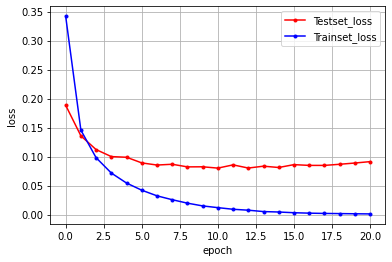

In [7]:
# 검증셋과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현하기
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

=> 23번째 실행에서 멈춤. 베스트 모델은 11번째 에포크일 때이며, 테스트셋 정확도는 98.15%이다.